In [1]:
#importing libraries
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for Datetime 
from datetime import datetime

# set theme for visualization
plt.style.use("seaborn-whitegrid")

# Create an array with the colors you want to use
colors = ["#54436B", "#50CB93", "#ED8E7C", "#FFD523", '#00C1D4', '#F8485E']

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

In [2]:
#loading datasets
df = pd.read_csv("../input/avocado-prices/avocado.csv",index_col=[0])

In [3]:
#first five rows 
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# last five rows
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


**Index of last five rows looks weird, let's examine the index of DataFrame**

In [5]:
# shape of dataset.
df.shape

(18249, 13)

In [6]:
# Total index values musch match with rows of data.
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
             2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
           dtype='int64', length=18249)

In [7]:
df.loc[0]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
0,2015-12-27,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,Atlanta
0,2015-12-27,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.00,conventional,2015,BaltimoreWashington
0,2015-12-27,0.97,62909.69,30482.25,2971.94,5894.40,23561.10,23520.19,5.69,35.22,conventional,2015,Boise
0,2015-12-27,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.00,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.04,14503.47,78.95,148.37,0.00,14276.15,9992.31,4283.84,0.00,organic,2018,Syracuse
0,2018-03-25,1.41,10028.49,138.15,773.22,0.00,9117.12,8208.82,908.30,0.00,organic,2018,Tampa
0,2018-03-25,1.55,1559967.20,121007.94,342853.10,1070.24,1093861.09,902774.79,190941.84,144.46,organic,2018,TotalUS
0,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,organic,2018,West


**It has repeated index So, let's reset index.**

In [8]:
# Resetting index of dataframe 'df'
df.reset_index(drop=True, inplace=True)

print("Index Range: ", df.index)
df.loc[0] # should print only one 0th row.

Index Range:  RangeIndex(start=0, stop=18249, step=1)


Date              2015-12-27
AveragePrice            1.33
Total Volume         64236.6
4046                 1036.74
4225                 54454.8
4770                   48.16
Total Bags           8696.87
Small Bags           8603.62
Large Bags             93.25
XLarge Bags                0
type            conventional
year                    2015
region                Albany
Name: 0, dtype: object

## Columns Discription
* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold



In [9]:
# Change the columns names.
df.rename(columns = {"Total Volume":"TotalSales",
                     "4046":"A4046Sales", 
                     "4225":"A4225Sales", 
                     "4770":"A4770Sales",
                     "Total Bags":"TotalBags", 
                     "Small Bags": "SmallBags", 
                     "Large Bags":"LargeBags", 
                     "XLarge Bags":"XLargeBags"}, inplace=True)
df.head()

,Date,AveragePrice,TotalSales,A4046Sales,A4225Sales,A4770Sales,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
# summary
df.describe()

,AveragePrice,TotalSales,A4046Sales,A4225Sales,A4770Sales,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   TotalSales    18249 non-null  float64
 3   A4046Sales    18249 non-null  float64
 4   A4225Sales    18249 non-null  float64
 5   A4770Sales    18249 non-null  float64
 6   TotalBags     18249 non-null  float64
 7   SmallBags     18249 non-null  float64
 8   LargeBags     18249 non-null  float64
 9   XLargeBags    18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [12]:
# datatypes of data columns
df.dtypes

Date             object
AveragePrice    float64
TotalSales      float64
A4046Sales      float64
A4225Sales      float64
A4770Sales      float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object

**The Date columns has datatype of 'Object', Let's change into datetime.**

In [13]:
# Converting 'Date' into datetime format.
df['Date'] = pd.to_datetime(df.Date)
df['Date'].head()

0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-12-06
4   2015-11-29
Name: Date, dtype: datetime64[ns]

In [14]:
# Missing data.
df.isnull().sum()

Date            0
AveragePrice    0
TotalSales      0
A4046Sales      0
A4225Sales      0
A4770Sales      0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

**No missing values**

In [15]:
# To check if dataframe has any duplicates.
df.duplicated().sum()

0

**There are no duplicate rows.**

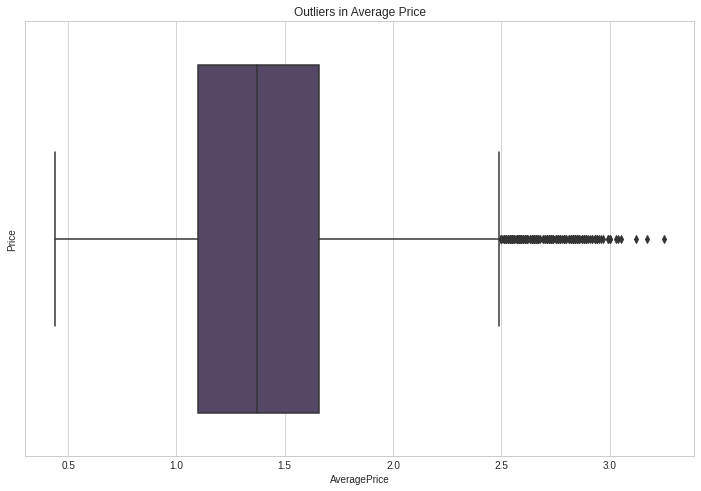

In [16]:
# Check Outliers in Average price.
ax = plt.figure(figsize=(12, 8))

sns.boxplot(x='AveragePrice', data = df)

plt.ylabel("Price")
plt.title("Outliers in Average Price")

plt.show()

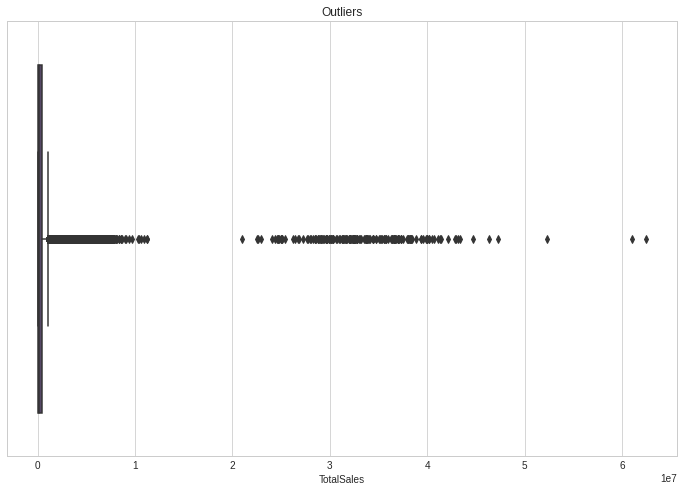

In [17]:
# Check Outliers in Average price.
ax = plt.figure(figsize=(12, 8))

sns.boxplot(x='TotalSales', data = df)

plt.title("Outliers")
plt.show()

**There are some Outliers in Average Price**

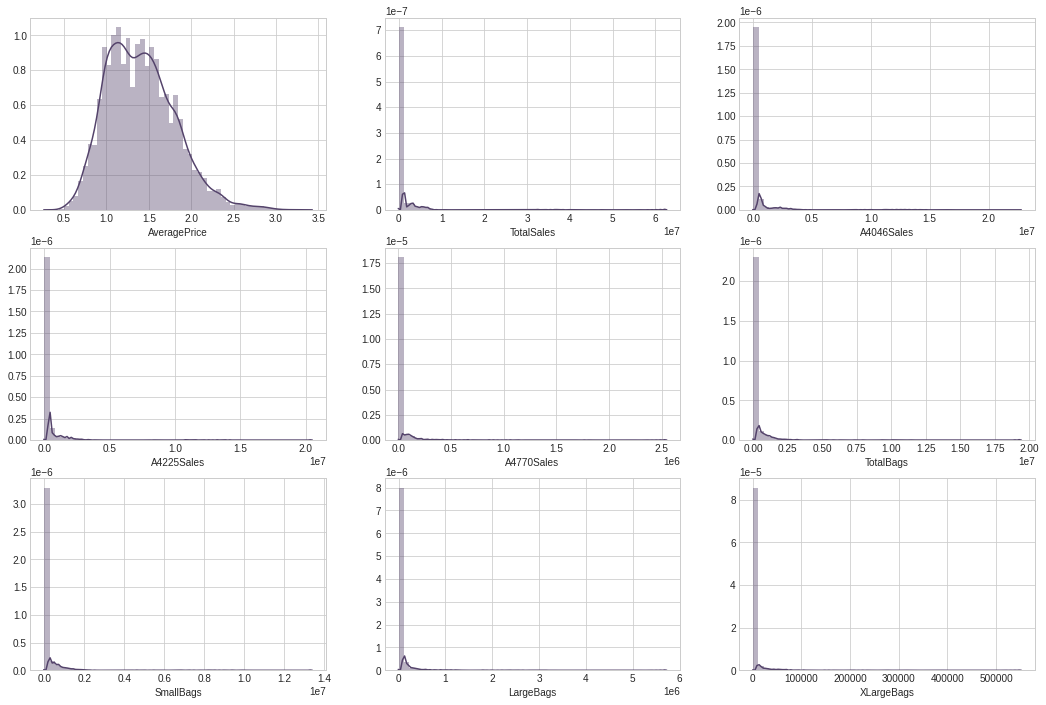

In [18]:
# Distribution of Data in numeric datatype.
columns = ['AveragePrice', 'TotalSales', 'A4046Sales', 'A4225Sales', 'A4770Sales', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']

fig,axs = plt.subplots(3, 3, figsize=(18, 12))
l = [(x, y) for x in range(3) for y in range(3)]

for i in range(len(columns)):
    ax1 = sns.distplot(df[columns[i]], ax = axs[l[i]])
    
plt.show()

In [19]:
# Add Yearmonth and Month column.
df['YearMonth'] = df.Date.apply(lambda x: x.strftime(format='%Y-%m'))
df['Month'] = df.Date.apply(lambda x: x.strftime(format='%m'))

In [20]:
df

,Date,AveragePrice,TotalSales,A4046Sales,A4225Sales,A4770Sales,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,YearMonth,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018-02,02
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018-01,01
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018-01,01
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018-01,01


## Avocado Price Trends

* Yearly trend of average price of Avocado per Unit.
* Monthly trend of Price of Avocado.

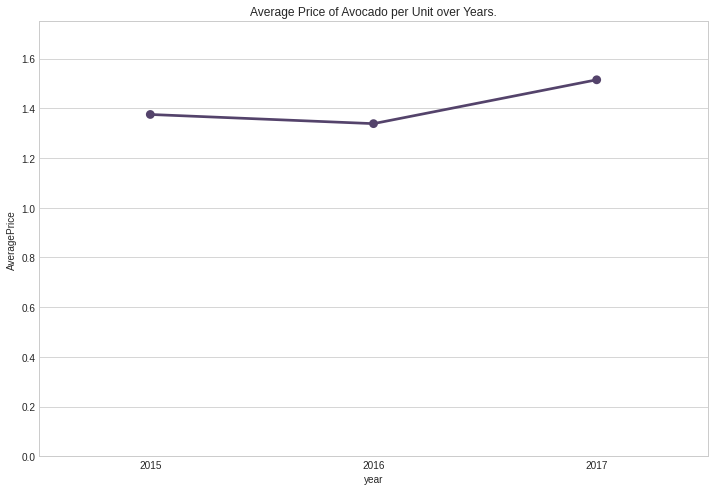

In [21]:
# Yearly AveragePrice of Avocado.
data = df.loc[df.year!=2018]
a = pd.DataFrame(data.groupby('year').mean().AveragePrice)

plt.figure(figsize=(12, 8))
sns.pointplot(x=a.index, y = 'AveragePrice', data=a)

plt.ylim(0, 1.75)
plt.title("Average Price of Avocado per Unit over Years.")
plt.show()

**Avocado price increases per year**

In [22]:
# Monthly observation of Avocado Price for each year.
data = df.loc[df.year==2015, ['Month', 'AveragePrice']]
df_2015 = data.groupby(by=['Month']).mean().round(2)


data = df.loc[df.year==2016, ['Month', 'AveragePrice']]
df_2016 = data.groupby(by=['Month']).mean().round(2)


data = df.loc[df.year==2017, ['Month', 'AveragePrice']]
df_2017 = data.groupby(by=['Month']).mean().round(2)


data = df.loc[df.year==2018, ['Month', 'AveragePrice']]
df_2018 = data.groupby(by=['Month']).mean().round(2)

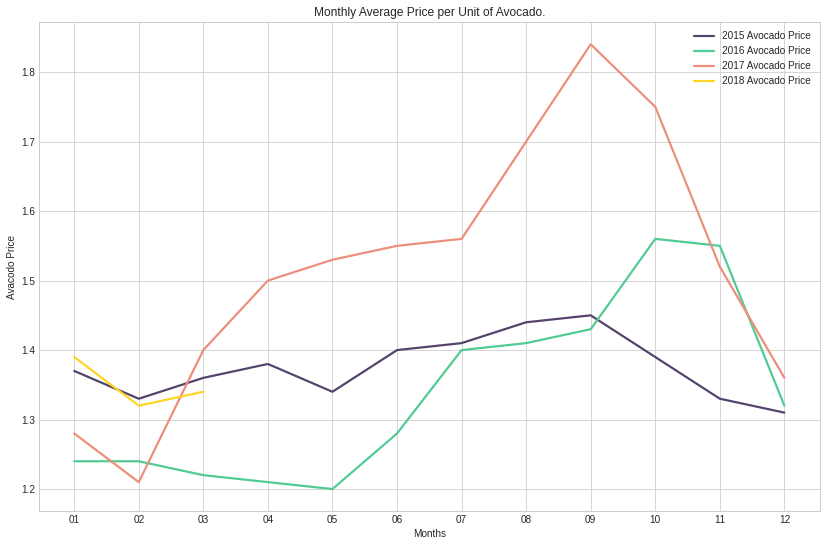

In [23]:
# Visualization for the Monthly Average Price of Avocado

plt.figure(figsize=(14, 9))

plt.plot(df_2015, linewidth=2.2, label='2015 Avocado Price')
plt.plot(df_2016, linewidth=2.2, label='2016 Avocado Price')
plt.plot(df_2017, linewidth=2.2, label='2017 Avocado Price')
plt.plot(df_2018, linewidth=2.2, label='2018 Avocado Price')

plt.xlabel("Months")
plt.ylabel("Avacodo Price")
plt.title("Monthly Average Price per Unit of Avocado.")

plt.legend()
plt.show()

**Single Avocado average price in months from July to Octobar seems higher as compare to other months in each year and lower in months from January to  March**

## Avocado Sales Trends

* Yearly trends for Total Sales and Sales with PLU types.
* Monthly Trends for Total Sales and Sales with PLU types.
* Relation between AveragePrice and Total Sales

In [24]:
# datasets for each year.
df_2015 = df.loc[df.year==2015]
df_2016 = df.loc[df.year==2016]
df_2017 = df.loc[df.year==2017]
df_2018 = df.loc[df.year==2018]

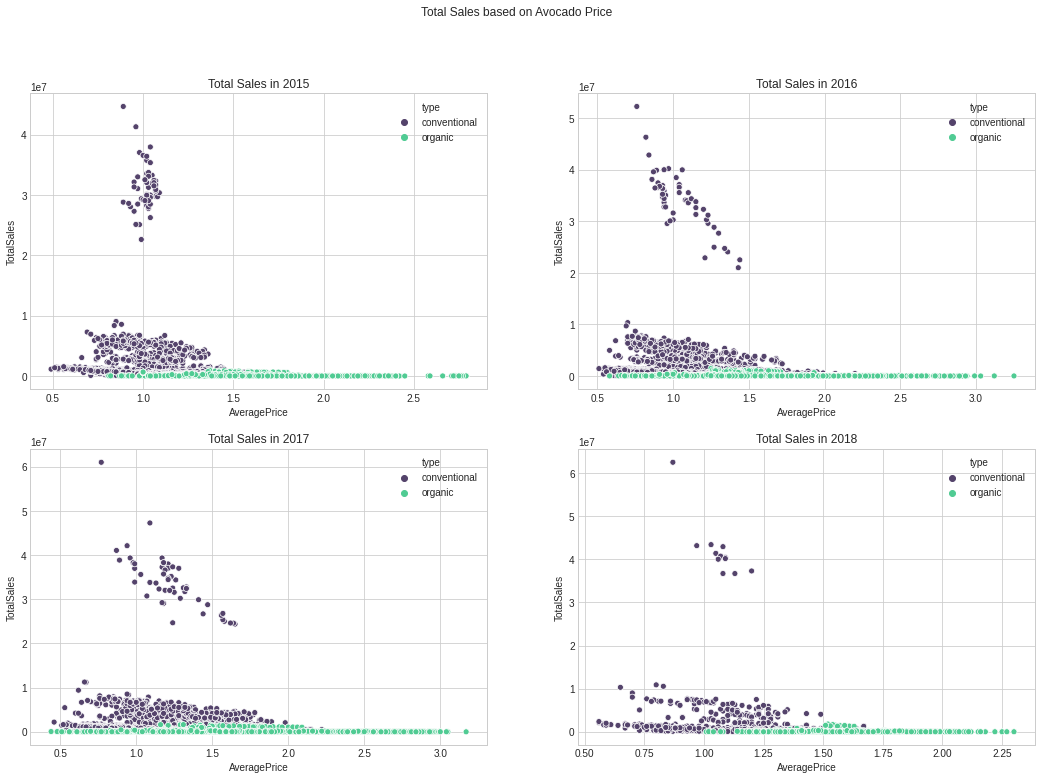

In [25]:
# Yearly sales of Avocado's based on it's unit price.

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle("Total Sales based on Avocado Price")

axs1 = sns.scatterplot(ax=axs[0, 0], x='AveragePrice', y='TotalSales', data=df_2015, hue='type')
axs1.set_title("Total Sales in 2015")
                       
axs2 = sns.scatterplot(ax=axs[0, 1], x='AveragePrice', y='TotalSales', data=df_2016, hue='type')
axs2.set_title("Total Sales in 2016")


axs3 = sns.scatterplot(ax=axs[1, 0], x='AveragePrice', y='TotalSales', data=df_2017, hue='type')
axs3.set_title("Total Sales in 2017")

axs4 = sns.scatterplot(ax=axs[1, 1], x='AveragePrice', y='TotalSales', data=df_2018, hue='type')
axs4.set_title("Total Sales in 2018")


plt.show()

**We can see that, cutomers tends to buy more when price of avocado is less than 1.5 dollar per unit. But this is for conventional type Avocado. For Organic type, there is same sale rate irrespective of its price in each year.**

In [26]:
df.head()

,Date,AveragePrice,TotalSales,A4046Sales,A4225Sales,A4770Sales,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,YearMonth,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11,11


In [27]:
data = pd.DataFrame(df.groupby('year').mean())

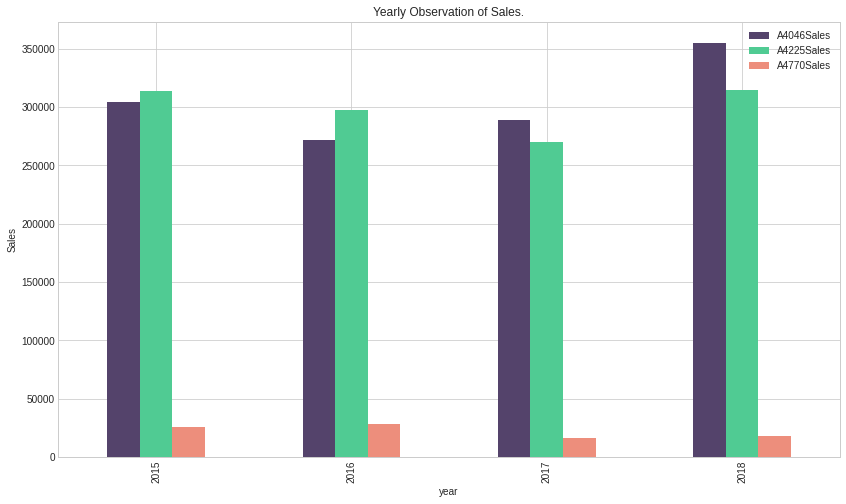

In [28]:
# Yearly observation of Sales with different PLU's code based Average price of avocado.
data = data.loc[:, ['A4046Sales', 'A4225Sales', 'A4770Sales']]
data.plot(kind='bar', figsize=(14, 8))

plt.ylabel("Sales")
plt.title("Yearly Observation of Sales.")

plt.show()

In [29]:
data = df.groupby(by=['Month', 'year']).mean()
data.head()

AveragePrice     TotalSales     A4046Sales     A4225Sales  \
Month year                                                              
01    2015      1.365046  736308.355532  296829.313565  301506.093912   
      2016      1.240185  880381.047370  248846.960093  354846.291574   
      2017      1.277500  987653.765574  317062.237130  336661.843815   
      2018      1.387431  994692.323194  332695.723565  311502.106019   
02    2015      1.326944  839438.887106  354552.080000  334110.463727   

              A4770Sales      TotalBags      SmallBags     LargeBags  \
Month year                                                             
01    2015  20635.684028  117337.264028   96502.584213  20513.634144   
      2016  36216.326611  240471.469093  176353.023167  61009.767944   
      2017  17590.070759  316339.613870  240422.766833  73925.408593   
      2018  17719.315556  332771.772245  240705.805625  88317.636389   
02    2015  24220.692431  126555.650949  106004.821690  20017.510602   

             XLargeBags  
Month year               
01    2015   321.045671  
      2016  3108.677981  
      2017  1991.438444  
      2018  3748.330231  
02    2015   533.318657

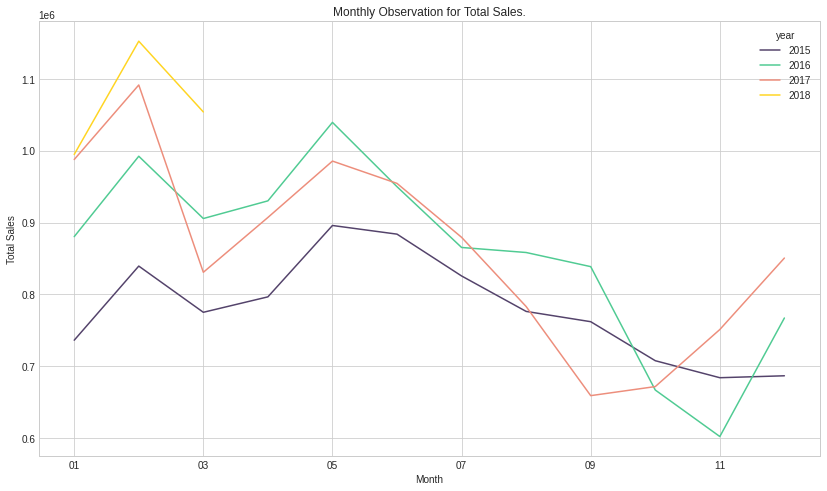

In [30]:
# Monthly obseveration of Total Sales for each year.
total_sales_data = data['TotalSales']

total_sales_data.unstack().plot(kind='line', figsize=(14, 8))

plt.ylabel("Total Sales")
plt.title("Monthly Observation for Total Sales.")

plt.show()

**There are more sales in months from January to March and May since avocado's price are lowest in those months as compare to other months.**

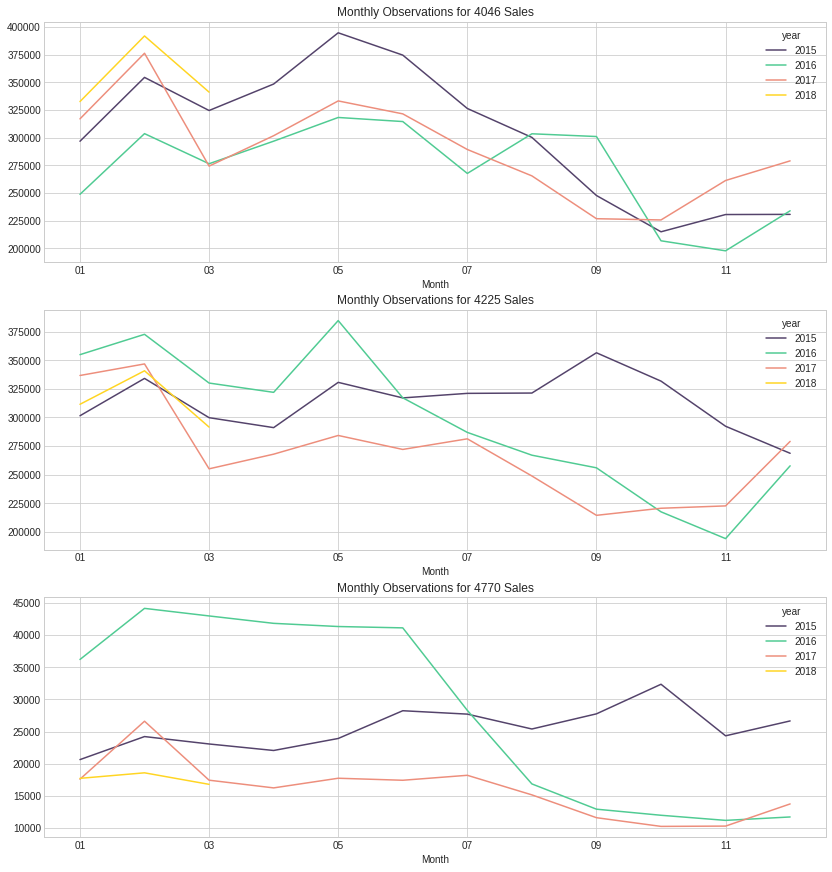

In [31]:
# Monthly obseveration of Sales for each year.
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14, 15))

axs1 = data.unstack().plot(kind='line', y='A4046Sales', ax=axs[0])
axs1.set_title("Monthly Observations for 4046 Sales")

axs2 = data.unstack().plot(kind='line', y='A4225Sales', ax=axs[1])
axs2.set_title("Monthly Observations for 4225 Sales")

axs3 = data.unstack().plot(kind='line', y='A4770Sales', ax=axs[2])
axs3.set_title("Monthly Observations for 4770 Sales")


plt.show()

**The Sales for 4225 columns is higher for each year in month of February and May as compare to other months.**

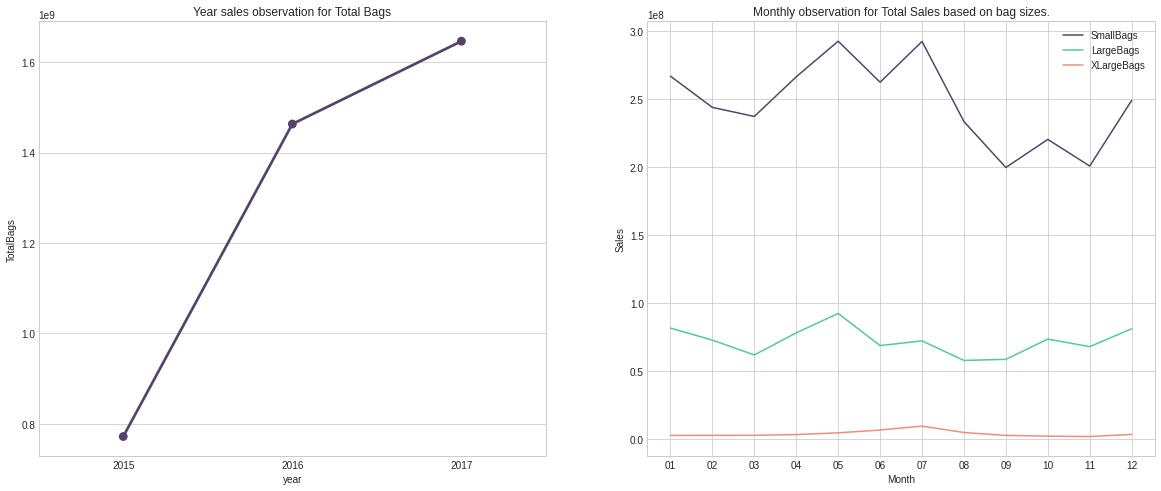

In [32]:
# Yearly sold TotalBags.
data = df.loc[df.year != 2018]
yrSales = pd.DataFrame(data.groupby(by=['year']).sum().TotalBags)
moSales = pd.DataFrame(data.groupby(by=['Month']).sum()[['SmallBags', 'LargeBags', 'XLargeBags']])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1 = sns.pointplot(x=yrSales.index, y = 'TotalBags', data=yrSales, ax=axs[0])
ax1.set_title("Year sales observation for Total Bags")

ax2 = sns.lineplot(x=moSales.index, y = 'SmallBags', data=moSales, ax=axs[1], label='SmallBags')
ax2 = sns.lineplot(x=moSales.index, y = 'LargeBags', data=moSales, ax=axs[1], label='LargeBags')
ax2 = sns.lineplot(x=moSales.index, y = 'XLargeBags', data=moSales, ax=axs[1], label='XLargeBags')
ax2.set_ylabel("Sales")
ax2.set_title("Monthly observation for Total Sales based on bag sizes.")

plt.show()


## Region wise trends in Sales and Price

In [33]:
# Region wise trends in Sales and Price.

# Total sales based on Region

region_grpData = pd.DataFrame((df.groupby(by=['region']).sum().TotalSales / df['TotalSales'].sum() *100).round(2))
region_grpData.sort_values(by='TotalSales',ascending=False, inplace=True)

print(region_grpData.head())
print("---"*10)
print(region_grpData.tail())

              TotalSales
region                  
TotalUS            37.78
West                7.00
California          6.63
SouthCentral        6.51
Northeast           4.59
------------------------------
            TotalSales
region                
Spokane           0.10
Louisville        0.10
Albany            0.10
Boise             0.09
Syracuse          0.07


In [34]:
print("Lowest Avocado Price")
print(df.loc[df.AveragePrice == df.AveragePrice.min(), 'region'])

print("--"*10)

print("Highest Avocado Price")
df.loc[df.AveragePrice == df.AveragePrice.max(), 'region']

Lowest Avocado Price
15261    CincinnatiDayton
Name: region, dtype: object
--------------------
Highest Avocado Price


14125    SanFrancisco
Name: region, dtype: object

In [35]:
# Let's examine the lowest price data.
data = df.loc[df.region == 'CincinnatiDayton']
data.head()

,Date,AveragePrice,TotalSales,A4046Sales,A4225Sales,A4770Sales,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,YearMonth,Month
468,2015-12-27,0.87,162993.77,2633.37,100444.22,9546.88,50369.30,14050.64,30968.06,5350.60,conventional,2015,CincinnatiDayton,2015-12,12
469,2015-12-20,0.85,175425.57,2732.05,108930.75,7517.01,56245.76,12118.45,39679.66,4447.65,conventional,2015,CincinnatiDayton,2015-12,12
470,2015-12-13,0.79,207386.27,3802.60,123544.78,4574.03,75464.86,15835.20,58783.54,846.12,conventional,2015,CincinnatiDayton,2015-12,12
471,2015-12-06,0.83,207513.04,2914.81,129978.67,15475.56,59144.00,13539.21,42885.85,2718.94,conventional,2015,CincinnatiDayton,2015-12,12
472,2015-11-29,0.88,141356.34,2399.32,94093.55,5885.57,38977.90,12785.15,24850.38,1342.37,conventional,2015,CincinnatiDayton,2015-11,11


In [36]:
# Let's see the shape of Lowest Price Data.
data.shape

(338, 15)

In [37]:
# Reset index.
data.reset_index(drop=True, inplace=True)
data.head()

,Date,AveragePrice,TotalSales,A4046Sales,A4225Sales,A4770Sales,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,YearMonth,Month
0,2015-12-27,0.87,162993.77,2633.37,100444.22,9546.88,50369.30,14050.64,30968.06,5350.60,conventional,2015,CincinnatiDayton,2015-12,12
1,2015-12-20,0.85,175425.57,2732.05,108930.75,7517.01,56245.76,12118.45,39679.66,4447.65,conventional,2015,CincinnatiDayton,2015-12,12
2,2015-12-13,0.79,207386.27,3802.60,123544.78,4574.03,75464.86,15835.20,58783.54,846.12,conventional,2015,CincinnatiDayton,2015-12,12
3,2015-12-06,0.83,207513.04,2914.81,129978.67,15475.56,59144.00,13539.21,42885.85,2718.94,conventional,2015,CincinnatiDayton,2015-12,12
4,2015-11-29,0.88,141356.34,2399.32,94093.55,5885.57,38977.90,12785.15,24850.38,1342.37,conventional,2015,CincinnatiDayton,2015-11,11


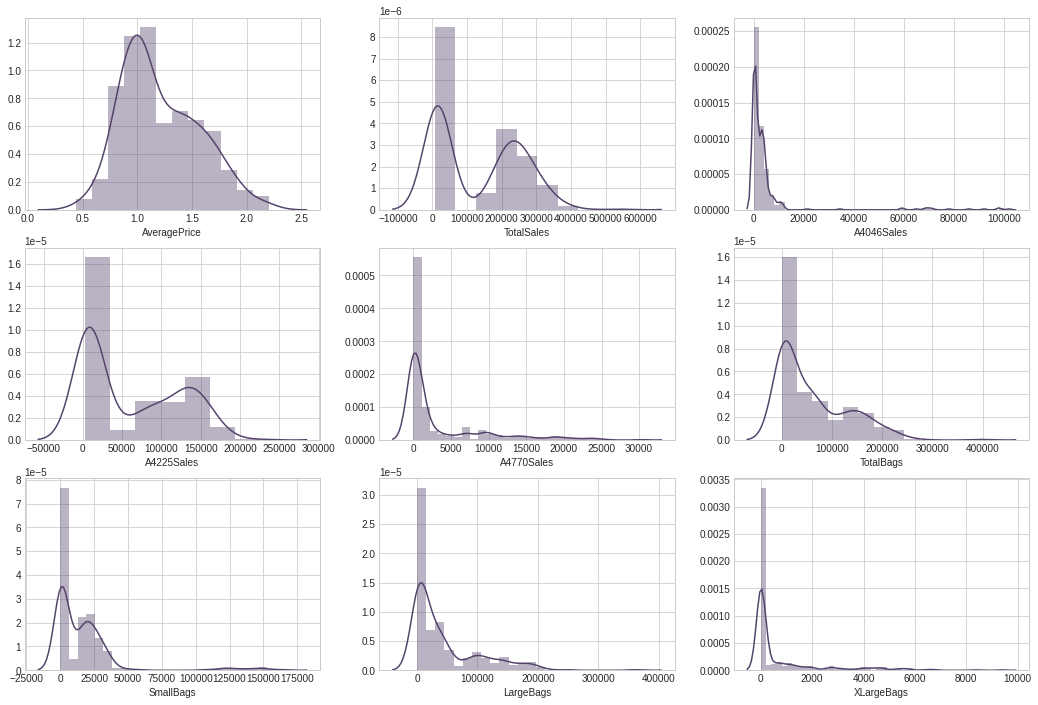

In [38]:
# Distribution of Data in numeric datatype.
columns = ['AveragePrice', 'TotalSales', 'A4046Sales', 'A4225Sales', 'A4770Sales', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']

fig,axs = plt.subplots(3, 3, figsize=(18, 12))
l = [(x, y) for x in range(3) for y in range(3)]

for i in range(len(columns)):
    ax1 = sns.distplot(data[columns[i]], ax = axs[l[i]])
    
plt.show()

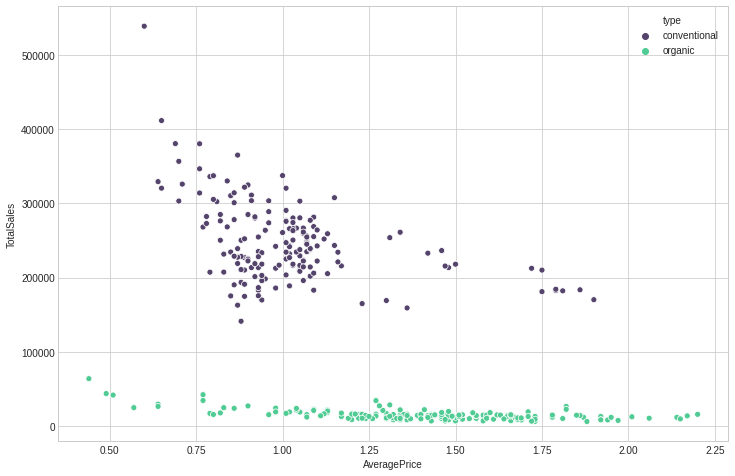

In [39]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='AveragePrice', y='TotalSales', hue='type',data = data)

plt.show()

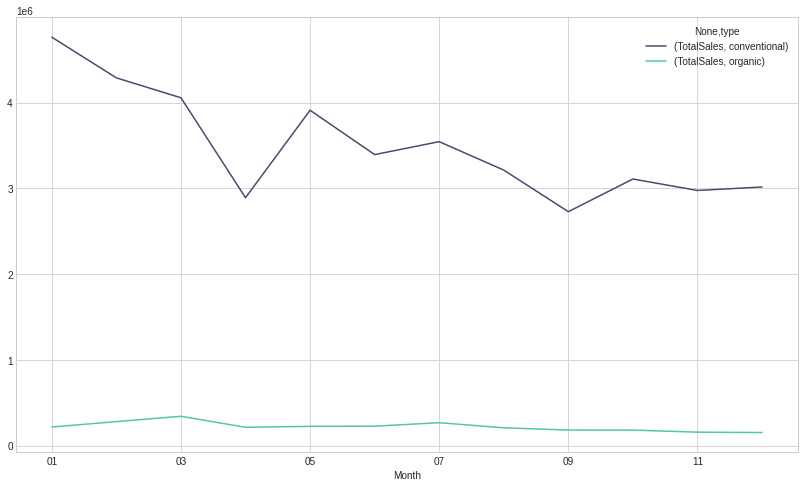

In [40]:

a = pd.DataFrame(data.groupby(by=['Month','type']).sum().TotalSales)

a.unstack().plot(kind='line', figsize=(14, 8))
plt.show()

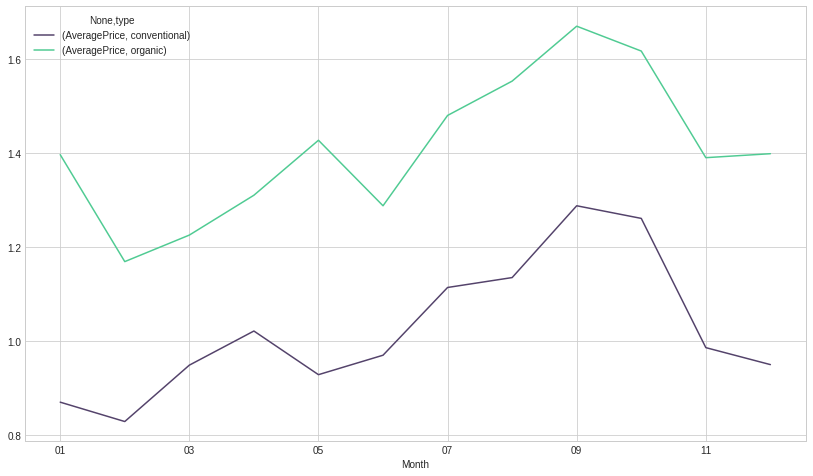

In [41]:
a = pd.DataFrame(data.groupby(by=['Month','type']).mean().AveragePrice)

a.unstack().plot(kind='line', figsize=(14, 8))
plt.show()

**Sales and Price has same trends for region CincinnatiDayton**